# New Section

### Identification of True and Fake News using BERT Model. 

import all neccessary libraries

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

Read the CSV files

In [5]:
df_true = pd.read_csv('True.csv',  engine='python' )
df_false = pd.read_csv('Fake.csv',  engine='python' )
#df = pd.read_csv('TrueFakeminidump.csv', engine = 'python')

In [6]:
df_true.shape

(21417, 4)

In [7]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
df_false.shape

(23481, 4)

In [9]:
df_false.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
df_true['TrueFake'] = 1
df_false ['TrueFake'] = 0

In [11]:
## taking only sample of data
df = pd.concat([df_true.head(500), df_false.head(500)])

In [12]:
df.shape

(1000, 5)

In [13]:
df.sample(5)

,title,text,subject,date,TrueFake
108,Sean Hannity Just Said Child Molestation Is O...,Republicans for some reason think it s perfect...,News,"November 9, 2017",0
99,Trump Laughs After Philippine Leader Calls Jo...,Donald Trump probably wishes the United States...,News,"November 13, 2017",0
434,Ex-Trump campaign aide Manafort in $11.65 mill...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"November 30, 2017",1
143,"After Pulling NFL-Related Ads, Papa John’s Ge...",Can things get any worse for Papa John s Pizza...,News,"November 4, 2017",0
50,Sources Confirm Robert Mueller’s Office Inter...,"Jared Kushner, senior White House adviser and ...",News,"November 30, 2017",0


In [14]:
df.subject.value_counts()

politicsNews    500
News            500
Name: subject, dtype: int64

In [15]:
df.TrueFake.value_counts()

1    500
0    500
Name: TrueFake, dtype: int64

In [16]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
TrueFake    0
dtype: int64

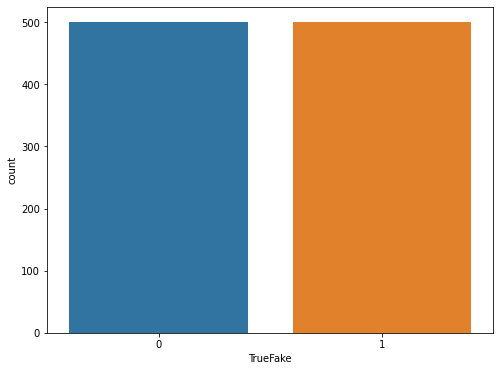

In [17]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'TrueFake', data = df)

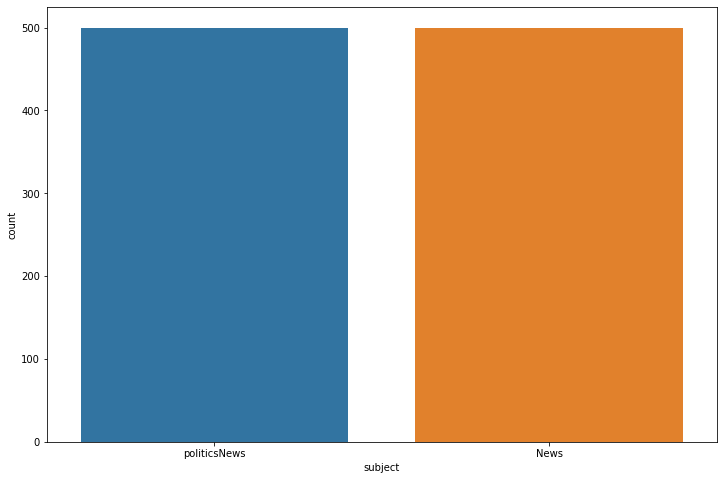

In [18]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'subject', data = df)

In [19]:
df = df.drop(columns = ['subject','date'])

In [20]:
df.sample(5)

,title,text,TrueFake
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,1
462,The Guy Donald Trump Called ‘My African-Ameri...,In between defending white supremacists and pa...,0
57,U.S. lawmakers seek temporarily extension to i...,WASHINGTON (Reuters) - Republican leaders in t...,1
66,"In Georgia, battle of the 'Staceys' tests Demo...",ATLANTA (Reuters) - The two Democratic candida...,1
128,Latest From Conservatives: God Was Answering ...,"We are 308 days into 2017, and so far there ha...",0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1000 non-null   object
 1   text      1000 non-null   object
 2   TrueFake  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 51.2+ KB


In [22]:
df.describe()

,TrueFake
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [23]:
df['news'] = df['title'] + df['text']
df = df.drop(columns =['title','text'])
df

,TrueFake,news
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
495,0,RNC Staffer Assigned To Finding Positive Stor...
496,0,"Trump Wants It Both Ways, But You Can’t Pass ..."
497,0,"REPORT: Mueller Hot On Trump’s Trail, Has Bui..."
498,0,House Dem Wants GOP On Record: Stop Gov’t Spe...


In [24]:
#clean data
def cleantext(txt):
    cleantxt = re.sub('[^a-zA-Z0-9 \n\.]','',txt)
    return cleantxt


df['cleannews'] = df['news'].apply(cleantext)

In [25]:
df = df.drop(columns = ['news'])

In [26]:
## train test split ## can also write as  train_test_split(df[cleantext], df[TrueFake])
Y = df.TrueFake  
X = df.drop('TrueFake', axis = 1)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, 
                                                    random_state = 42,
                                                    test_size = 0.2)

## now create the validation and test set from temp set

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp,
                                                random_state = 42,
                                                test_size = 0.5)

In [27]:
df['Recordtype'] = '' * df.shape[0]
df.loc[X_train.index.values, 'Recordtype'] = 'train'
df.loc[X_test.index.values,'Recordtype'] = 'test'
df.loc[X_val.index.values, 'Recordtype'] = 'validation'

In [ ]:
df

,Unnamed: 0,TrueFake,cleannews,Recordtype
0,0,1,As U.S. budget fight looms Republicans flip th...,validation
1,1,1,U.S. military to accept transgender recruits o...,train
2,2,1,Senior U.S. Republican senator Let Mr. Mueller...,train
3,3,1,FBI Russia probe helped by Australian diplomat...,train
4,4,1,Trump wants Postal Service to charge much more...,test
...,...,...,...,...
95,45,0,White House Panics Knowing Flynn Is Going To ...,train
96,46,0,BREAKING Michael Flynn CRACKS Will Testify T...,train
97,47,0,Trump Gets An Epic Fck You From Britain Over ...,train
98,48,0,This Hilarious Campaign Ad Shows Voters How T...,train


In [28]:
df.isnull().sum()

TrueFake      0
cleannews     0
Recordtype    0
dtype: int64

In [29]:
df.groupby(['TrueFake','Recordtype']).count()

cleannews
TrueFake Recordtype           
0        test               87
         train             315
         validation         98
1        test               87
         train             315
         validation         98

In [2]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 13.1 MB/s 
     |████████████████████████████████| 596 kB 44.0 MB/s 
     |████████████████████████████████| 3.3 MB 35.7 MB/s 
     |████████████████████████████████| 895 kB 41.9 MB/s 
     |████████████████████████████████| 61 kB 542 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [30]:
#now tokenize the train, validate and test data and convert into Tensor Dataset
## BERT requires special tokens, have sequences of equal length so padding needed, 
## need to pass attention mask to differentiate between token and padding

encode_train = tokenizer.batch_encode_plus(df[df.Recordtype == 'train'].cleannews.values, 
                                           add_special_tokens = True,
                                           return_attention_mask = True, 
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

encode_validate = tokenizer.batch_encode_plus(df[df.Recordtype == 'validation'].cleannews.values,
                                              add_special_tokens = True,
                                              return_attention_mask = True,
                                              pad_to_max_length = True,
                                              max_length = 256,
                                              return_tensors = 'pt')

encode_test = tokenizer.batch_encode_plus(df[df.Recordtype == 'test'].cleannews.values,
                                          add_special_tokens = True,
                                          return_attention_mask = True, 
                                          pad_to_max_length = True,
                                          max_length = 256,
                                          return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [31]:
## check out the data to get the columns names to create tensors
##transformers.tokenization_utils_base.BatchEncoding --> actually a disctionary

print(encode_train.keys())
#print(encode_train['input_ids'])
#print(encode_train['attention_mask'])
#print(len(encode_train['input_ids'][0])) - 256 as given in code

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [32]:
## create the individual tensors for creating dataset

input_id_train = encode_train['input_ids']
attention_mask_train =  encode_train['attention_mask']
label_train = torch.tensor(df[df.Recordtype == 'train'].TrueFake.values)

input_id_val = encode_validate['input_ids']
attention_mask_val = encode_validate['attention_mask']
label_val = torch.tensor(df[df.Recordtype == 'validation'].TrueFake.values)

input_id_test = encode_test['input_ids']
attention_mask_test = encode_test['attention_mask']
label_test = torch.tensor(df[df.Recordtype == 'test'].TrueFake.values)

In [ ]:
## check out the values of all three tensors

print(input_id_train)
#attention_mask_train
print(label_train)

tensor([[  101,  1057,  1012,  ...,  2000,  1996,   102],
        [  101,  3026,  1057,  ...,  2015,  2535,   102],
        [  101,  8495,  3607,  ...,  2988,  2008,   102],
        ...,
        [  101,  8398,  4152,  ...,  2006,  1996,   102],
        [  101,  2023, 26316,  ...,  2013,  4424,   102],
        [  101,  3533, 18603,  ...,  2031,  8307,   102]])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [33]:
from torch.utils.data import TensorDataset
dataset_train = TensorDataset(input_id_train, attention_mask_train, label_train)
dataset_validate = TensorDataset(input_id_val, attention_mask_val, label_val)
dataset_test = TensorDataset(input_id_test, attention_mask_test, label_test)

In [ ]:
print(dataset_train[1][1])
##list of tensors, 0 contains input id, 1 contains labels 
##<torch.utils.data.dataset.TensorDataset at 0x19af2daac70> -- dictionary

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [4]:
## model 
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                       num_labels = 2, 
                                                       output_attentions = False,
                                                       output_hidden_states = False,
                                                       return_dict = False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
## check the model
#last_hidden_state, pooled_output = model(input_id_train ,attention_mask_train )
#last_hidden_state.shape
#pooled_output.shape

In [34]:
## create dataloaders, since we are working with BERT, we need to divide input data into batches, 
## we will use Random Sampler for train and Sequential Sampler for validate and test data
## check for num_workers

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

dataloader_val = DataLoader(dataset_validate,
                            sampler = SequentialSampler(dataset_validate),
                            batch_size = batch_size)

dataloader_test = DataLoader(dataset_test, 
                             sampler = SequentialSampler(dataset_test),
                             batch_size = batch_size)

In [ ]:
#dataloader_train
inputs, classes = next(iter(dataloader_train)) 

In [35]:
## before training, we need to define Optimizer and scheduler

from transformers import AdamW, get_linear_schedule_with_warmup
epoch = 10
optimizer = AdamW(model.parameters(),
                  lr = 1e-5,
                  eps = 1e-8)

scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = len(dataset_train) * epoch)

In [36]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    pred_flat = np.argmax(preds, axis =1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, pred_flat, average = 'weighted')

In [37]:
def evaluate(dataloader_val):
    model.eval()
    loss_vald_total = []
    prediction_validate, true_value = [], []
    
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        with torch.no_grad():
            outputs = model(**inputs)
            
        loss = outputs[0]
        logit = outputs[1]
        loss_vald_total.append(loss.item()) 
        labels_ids = inputs['labels'].detach().cpu().numpy()
        prediction_validate.append(logit)
        true_value.append(labels_ids)
        
    predt = [t.detach().cpu().numpy() for t in prediction_validate]
    predictions = np.concatenate(predt, axis = 0)
    true_vals = np.concatenate(true_value, axis = 0)
    f1_score_value = f1_score_func(predictions, true_vals)
    loss_vald_avg = np.mean(loss_vald_total)
        
    return loss_vald_avg, f1_score_value
        

In [38]:
## start the training process now 

## parameters setup for reproduceablity
import random
import numpy as np
seedval = 17
random.seed(seedval)
np.random.seed(seedval)
torch.manual_seed(seedval)
torch.cuda.manual_seed_all(seedval)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [39]:
## secondary code for main training
## use tqdm for progress bar for each epoch
from tqdm import tqdm

for i in tqdm(range(1, epoch +1)):
    model.train()
    loss_train_total, f1_list = [], []
    best_f1_score = 0
    progress_bar = tqdm(dataloader_train, 
                        desc = 'Epoch {0}'.format(i),
                        leave = False)
    
    for batch in progress_bar:
        ##explicitly set the gradients to zero before starting to do backpropragation
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
    
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        
        ## get losses, labels and pred for F1 score
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total.append(loss.item())         
        
        ##avoiding exploding gradients by clipping the gradients of the model using clipgrad_norm
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    
    
    loss_val_avg, f1_score_value = evaluate(dataloader_val)
    f1_list.append(f1_score_value)
    tqdm.write('F1 Score {0}'.format(f1_score_value))
    
    if f1_score_value > best_f1_score:
        torch.save(model.state_dict(), 'BERTTrueFakeDetection.model')
        best_f1_score = f1_score_value
        tqdm.write('Best model save at score {0}'.format(f1_score_value))
        
    loss_train_avg = np.mean(loss_train_total)
    tqdm.write('Current loss {0}'.format(loss_train_avg))
    tqdm.write('Current vald loss {0}'.format(loss_val_avg))

Epoch 1: 100%|██████████| 158/158 [01:04<00:00,  2.75it/s]
                                                          
  0%|          | 0/10 [01:10<?, ?it/s]

F1 Score 0.969375


 10%|█         | 1/10 [01:11<10:46, 71.80s/it]

Best model save at score 0.969375
Current loss 0.25332902777126604
Current vald loss 0.13060245059943776



Epoch 2: 100%|██████████| 158/158 [01:05<00:00,  2.71it/s]
                                                          
 10%|█         | 1/10 [02:23<10:46, 71.80s/it]

F1 Score 0.9795897115484744


 20%|██        | 2/10 [02:25<09:42, 72.80s/it]

Best model save at score 0.9795897115484744
Current loss 0.043551030413312486
Current vald loss 0.12236623407569619



Epoch 3: 100%|██████████| 158/158 [01:05<00:00,  2.69it/s]
                                                          
 20%|██        | 2/10 [03:37<09:42, 72.80s/it]

F1 Score 0.9795897115484744


 30%|███       | 3/10 [03:39<08:33, 73.33s/it]

Best model save at score 0.9795897115484744
Current loss 0.0008409241825206606
Current vald loss 0.13178853044222222



Epoch 4: 100%|██████████| 158/158 [01:06<00:00,  2.70it/s]
                                                          
 30%|███       | 3/10 [04:51<08:33, 73.33s/it]

F1 Score 0.9795897115484744


 40%|████      | 4/10 [04:53<07:21, 73.55s/it]

Best model save at score 0.9795897115484744
Current loss 0.00043667505585140534
Current vald loss 0.15197495594608826



Epoch 5: 100%|██████████| 158/158 [01:06<00:00,  2.70it/s]
                                                          
 40%|████      | 4/10 [06:05<07:21, 73.55s/it]

F1 Score 0.9795897115484744


 50%|█████     | 5/10 [06:07<06:08, 73.72s/it]

Best model save at score 0.9795897115484744
Current loss 0.00027062308919672043
Current vald loss 0.1463322485785228



Epoch 6: 100%|██████████| 158/158 [01:06<00:00,  2.69it/s]
                                                          
 50%|█████     | 5/10 [07:19<06:08, 73.72s/it]

F1 Score 0.9795897115484744


 60%|██████    | 6/10 [07:21<04:55, 73.82s/it]

Best model save at score 0.9795897115484744
Current loss 0.0001928578094060568
Current vald loss 0.13876464346715378



Epoch 7: 100%|██████████| 158/158 [01:06<00:00,  2.69it/s]
                                                          
 60%|██████    | 6/10 [08:33<04:55, 73.82s/it]

F1 Score 0.9795897115484744


 70%|███████   | 7/10 [08:35<03:41, 73.90s/it]

Best model save at score 0.9795897115484744
Current loss 0.0001454538539718082
Current vald loss 0.13386445334870178



Epoch 8: 100%|██████████| 158/158 [01:06<00:00,  2.70it/s]
                                                          
 70%|███████   | 7/10 [09:47<03:41, 73.90s/it]

F1 Score 0.9846934791097227


 80%|████████  | 8/10 [09:49<02:27, 73.95s/it]

Best model save at score 0.9846934791097227
Current loss 0.00011237491850772153
Current vald loss 0.13353546392540827



Epoch 9: 100%|██████████| 158/158 [01:06<00:00,  2.70it/s]
                                                          
 80%|████████  | 8/10 [11:01<02:27, 73.95s/it]

F1 Score 0.9846934791097227


 90%|█████████ | 9/10 [11:03<01:13, 73.97s/it]

Best model save at score 0.9846934791097227
Current loss 9.182691930526502e-05
Current vald loss 0.1360578087354655



Epoch 10: 100%|██████████| 158/158 [01:06<00:00,  2.71it/s]
                                                           
 90%|█████████ | 9/10 [12:15<01:13, 73.97s/it]

F1 Score 0.9846934791097227


100%|██████████| 10/10 [12:17<00:00, 73.73s/it]

Best model save at score 0.9846934791097227
Current loss 7.579315823460104e-05
Current vald loss 0.13694717817463464


In [54]:
def predict(dataloader_test):
    model.eval()
    loss_test_total = []
    prediction_test, true_value = [], []
    
    for batch in tqdm(dataloader_test):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        with torch.no_grad():
            outputs = model(**inputs)
            
        loss = outputs[0]
        logit = outputs[1]
        loss_test_total.append(loss.item()) 
        labels_ids = inputs['labels'].detach().cpu().numpy()
        #predic = torch.argmax(outputs, dim=1)
        prediction_test.append(logit)
        true_value.append(labels_ids)
        
    predt = [t.detach().cpu().numpy() for t in prediction_test]
    predictions = np.concatenate(predt, axis = 0)
    true_vals = np.concatenate(true_value, axis = 0)
    f1_score_value = f1_score_func(predictions, true_vals)
    loss_test_avg = np.mean(loss_test_total)
        
    return f1_score_value, predictions, true_value

In [55]:
y_preds, y_trueval=[], []
f1_test = 0
f1_test, y_preds, y_trueval = predict(dataloader_test)

100%|██████████| 44/44 [00:05<00:00,  8.07it/s]


In [ ]:
print(f1_test)
print(len(y_preds))
print(len(y_trueval))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_trueval, y_preds))